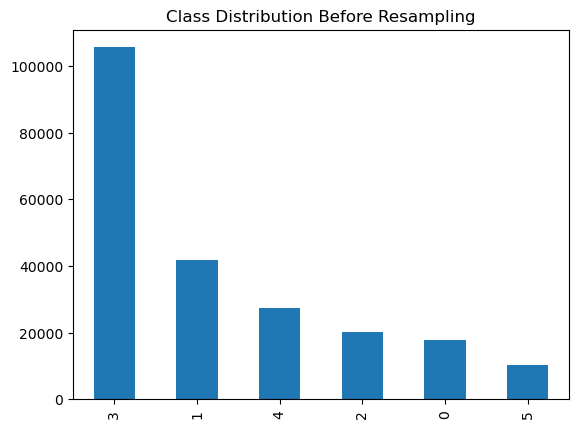

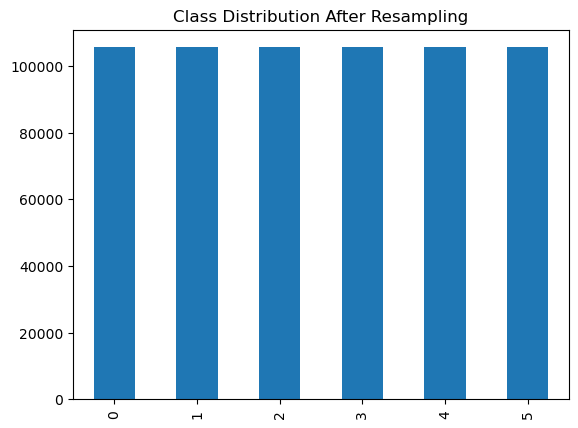

Resampled data saved as 'data_MQTT_final.csv'


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('combined_captured_data.csv')  # Replace with your actual file path

# Step 2: Handle missing values in the 'label' column
data['label'].fillna('legitimate', inplace=True)

# Step 3: Rename the 'label' column to 'target'
data.rename(columns={'label': 'target'}, inplace=True)

# Step 4: Apply Label Encoding using the provided mapping
label_mapping = {
    "legitimate": 0,
    "dos": 1,
    "slowite": 2,
    "malformed": 3,
    "bruteforce": 4,
    "flood": 5
}
data['target'] = data['target'].map(label_mapping)

# Step 5: Convert hexadecimal strings to integers
hex_columns = ['tcp_flags', 'mqtt_hdrflags']  # Add any other columns with hexadecimal values
for col in hex_columns:
    data[col] = data[col].apply(lambda x: int(x, 16) if isinstance(x, str) and x.startswith('0x') else x)

# Step 6: Apply frequency encoding to specific columns
columns_to_freq_encode = ['tcp_flags', 'mqtt_conflags', 'mqtt_msg', 'mqtt_hdrflags']
for column in columns_to_freq_encode:
    freq_encoding = data[column].value_counts().to_dict()
    data[column] = data[column].map(freq_encoding)

# Step 7: Convert hexadecimal values in binary columns before converting them to integers
binary_columns = ['mqtt_dupflag', 'mqtt_conack_flags', 'mqtt_conflag_cleansess']
for col in binary_columns:
    data[col] = data[col].apply(lambda x: int(x, 16) if isinstance(x, str) and x.startswith('0x') else x)

# Step 8: Handle binary categorical columns (convert to 0 and 1)
for column in binary_columns:
    data[column] = data[column].astype(int)

# Step 9: Separate the features and target
X = data.drop(columns=['target', 'timestamp'])  # Drop 'timestamp' since it's not useful for classification
y = data['target']

# Step 10: Check class distribution before SMOTE
y.value_counts().plot(kind='bar', title='Class Distribution Before Resampling')
plt.show()

# Step 11: Apply SMOTE for handling class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 12: Check class distribution after SMOTE
y_resampled.value_counts().plot(kind='bar', title='Class Distribution After Resampling')
plt.show()

# Step 13: Save the resampled data to a new CSV file
data_resampled_combined = pd.concat([X_resampled, y_resampled], axis=1)
data_resampled_combined.to_csv('combined_captured_data_MQTT_final.csv', index=False)

print("Resampled data saved as 'data_MQTT_final.csv'")


In [9]:
# Check the unique values in the 'target' column after applying the label mapping
print("Unique values in 'target' column after mapping:")
print(data['target'].unique())
# Check the frequency of each label in the 'target' column
print("Label frequency distribution after mapping:")
print(data['target'].value_counts())


Unique values in 'target' column after mapping:
[0 1 2 3 4 5]
Label frequency distribution after mapping:
3    105528
1     41802
4     27377
2     20090
0     17803
5     10213
Name: target, dtype: int64
